## Unsupervised Machine Learning

### Feature Scaling

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
gt = pd.read_csv('CSVs/globalterrorism10000.csv')
display(gt.shape)
gt.head()

(10000, 22)

,iyear,imonth,iday,more_than_24h,country_txt,city,latitude,longitude,news,suicide,...,targtype,targtype_txt,band_name,npeople_attacking,weapon,weapon_txt,nkill,news_processed,positive_sentiment,negative_sentiment
0,1970,3,5,0,United States,San Juan,18.386932,-66.061127,3/5/1970: Unknown Puerto Rican Nationalists as...,0,...,4,Military,Other,1,5,Firearms,2,"['unknown', 'puerto', 'rican', 'nationalist', ...",0.000,0.227
1,1970,3,9,0,United States,Bel Air,39.538940,-76.348479,3/9/1970: A bomb exploded in the car of Ralph ...,0,...,20,Unknown,Other,2,6,Explosives,2,"['bomb', 'explod', 'car', 'ralph', 'feathersto...",0.031,0.306
2,1970,3,20,0,United States,Detroit,42.331685,-83.047924,3/20/1970: Unknown perpetrators shot and kille...,0,...,14,Private Citizens & Property,Other,7,5,Firearms,1,"['unknown', 'perpetr', 'shot', 'kill', 'burton...",0.000,0.288
3,1970,4,24,0,United States,Baltimore,39.308342,-76.616104,4/24/1970: Three members of the Black Panthers...,0,...,3,Police,Other,3,5,Firearms,1,"['three', 'member', 'black', 'panther', 'parti...",0.000,0.324
4,1970,5,9,0,United States,Sacramento,38.551295,-121.471066,5/9/1970: Sacramento Police Officer Bernard Be...,0,...,3,Police,Other,40,5,Firearms,1,"['sacramento', 'polic', 'offic', 'bernard', 'b...",0.000,0.316


In [3]:
gt.dtypes

iyear                   int64
imonth                  int64
iday                    int64
more_than_24h           int64
country_txt            object
city                   object
latitude              float64
longitude             float64
news                   object
suicide                 int64
attacktype              int64
attacktype_txt         object
targtype                int64
targtype_txt           object
band_name              object
npeople_attacking       int64
weapon                  int64
weapon_txt             object
nkill                   int64
news_processed         object
positive_sentiment    float64
negative_sentiment    float64
dtype: object

### One Hot Encoding

In [4]:
cols = ['iyear', 'more_than_24h', 'country_txt', 'suicide', 'attacktype_txt', 'targtype_txt', 'band_name', 'weapon_txt', 'nkill', 'positive_sentiment', 'negative_sentiment']

gtk = gt[cols].copy()
gtk.dtypes

iyear                   int64
more_than_24h           int64
country_txt            object
suicide                 int64
attacktype_txt         object
targtype_txt           object
band_name              object
weapon_txt             object
nkill                   int64
positive_sentiment    float64
negative_sentiment    float64
dtype: object

In [5]:
cols = ['attacktype_txt', 'country_txt', 'targtype_txt', 'weapon_txt', 'band_name']
gtk = pd.get_dummies(data=gtk, columns=cols)

In [6]:
display(gtk.shape)
gtk.head()

(10000, 103)

,iyear,more_than_24h,suicide,nkill,positive_sentiment,negative_sentiment,attacktype_txt_Armed Assault,attacktype_txt_Assassination,attacktype_txt_Bombing/Explosion,attacktype_txt_Facility/Infrastructure Attack,...,band_name_Muslim extremists,band_name_New People's Army (NPA),band_name_Other,band_name_Palestinian Extremists,band_name_Revolutionary Armed Forces of Colombia (FARC),band_name_Salafist Group for Preaching and Fighting (GSPC),band_name_Separatists,band_name_Taliban,band_name_Tehrik-i-Taliban Pakistan (TTP),band_name_Unknown
0,1970,0,0,2,0.000,0.227,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1970,0,0,2,0.031,0.306,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1970,0,0,1,0.000,0.288,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1970,0,0,1,0.000,0.324,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1970,0,0,1,0.000,0.316,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Dendrogram

Hierarchical clustering, where we create a hierarchy of clusters. The advantage over k-means is that we do not need to specify the number of clusters. 

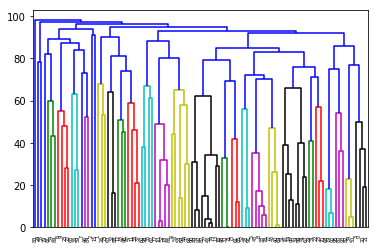

In [7]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

gtk_columns = [col for col in gtk.columns.values]
gtk_sample = gtk[gtk_columns].sample(n=100)
hier_clust = AgglomerativeClustering(linkage='ward')
gtk_hier = hier_clust.fit(gtk_sample)

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(gtk_hier)

A medida que baja de 100 a 0, hace la separación de los grupos que difieren en ese tanto por ciento.

Cuanto más bajo es el porcentaje, los clusters son más pequeños.

### StandardScaler

The value ranges are remarkably different across various categories. It could cause issues in our clustering. The way to reduce the problem is through feature scaling:

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(gtk)
gtk_scale = scaler.transform(gtk)
#gtk_scale

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Livia/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [9]:
# gtk_scale ---> to DataFrame

gtk_scale_df = pd.DataFrame(gtk_scale)

### K-Means Model Evaluation

### Silhouette score

To determine the best number of clusters to use:

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
for i in range(3, 50):
    kmeans = KMeans(n_clusters=i)
    gtk_kmeans = kmeans.fit(gtk_scale)

    score = silhouette_score(gtk_scale, gtk_kmeans.labels_, metric='euclidean')
    print("Silhouette score {} clusters: {}".format(i, score))

Silhouette score 3 clusters: 0.05678703454117041
Silhouette score 4 clusters: 0.06626036226726344
Silhouette score 5 clusters: 0.06911506187167894
Silhouette score 6 clusters: 0.04777421497306469
Silhouette score 7 clusters: 0.07710590569777002
Silhouette score 8 clusters: 0.023842660687284405
Silhouette score 9 clusters: 0.07919396747645469
Silhouette score 10 clusters: 0.06782306963077278
Silhouette score 11 clusters: 0.023646716070830142
Silhouette score 12 clusters: 0.08085681069389852
Silhouette score 13 clusters: 0.0560378639050048
Silhouette score 14 clusters: 0.09476319240814494
Silhouette score 15 clusters: 0.054375035434225734
Silhouette score 16 clusters: 0.04306580005858516
Silhouette score 17 clusters: 0.06730526363257613
Silhouette score 18 clusters: 0.1036600978799268
Silhouette score 19 clusters: 0.10304249667916594
Silhouette score 20 clusters: 0.08687941773225998
Silhouette score 21 clusters: 0.06977137043962359
Silhouette score 22 clusters: 0.0801775905659606
Silhoue

### Elbow curve

To determine the best number of clusters to use:

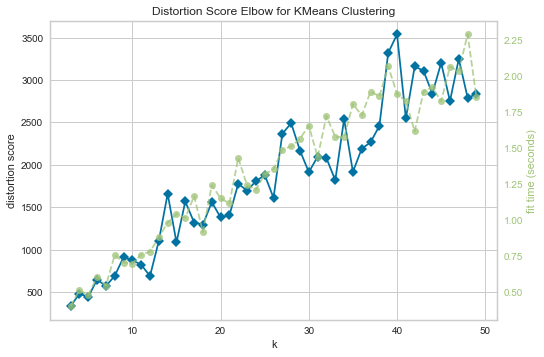

In [41]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,50))
visualizer.fit(gtk_scale)
visualizer.poof()

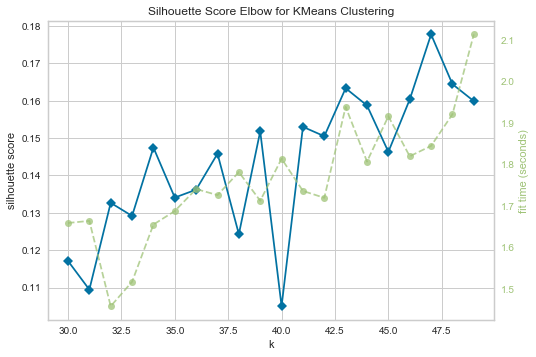

In [42]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(30,50),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()

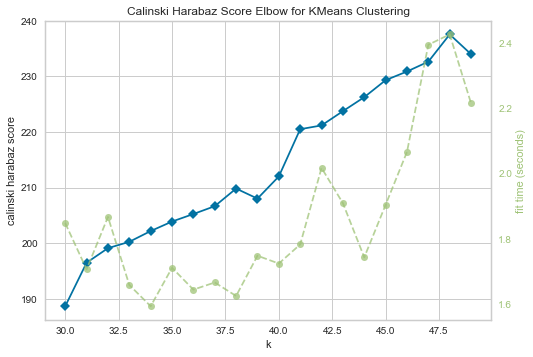

In [43]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(30,50),metric='calinski_harabaz')
visualizer.fit(gtk_scale)
visualizer.poof()

### Elbow curve - AgglomerativeClustering model 

In [ ]:
'''
from sklearn import cluster, datasets

single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10))
visualizer.fit(gtk_scale)
visualizer.poof()
'''

In [ ]:
'''
single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10),metric='silhouette')
visualizer.fit(gtk_scale)
visualizer.poof()
'''

In [ ]:
'''
single = cluster.AgglomerativeClustering(linkage='single')
visualizer = KElbowVisualizer(single, k=(2,10),metric='calinski_harabaz')
visualizer.fit(gtk_scale)
visualizer.poof()
'''

### Scatter Matrix 

Showing how the clusters are grouped across all the different combinations of variables in the data:

In [10]:
from sklearn import cluster, datasets
kmeans = cluster.KMeans(n_clusters=4)
gtk_clusters = kmeans.fit(gtk_scale_df)

gtk['labels'] = gtk_clusters.labels_ # Create hue

In [12]:
#import seaborn as sns

#sns.set(style="ticks", color_codes=True)

#sns.pairplot(gtk[gtk.columns[5:]], hue = 'labels')

In [ ]:
# AgglomerativeClustering model with 4 clusters
'''
agglo_kmeans = cluster.AgglomerativeClustering(n_clusters=4,linkage='ward') # linkage=single
gtk_clusters = agglo_kmeans.fit(gtk_scale)

gtk['labels_agglomerative'] = gtk_clusters.labels_ # Create hue

sns.set(style="ticks", color_codes=True)

sns.pairplot(gtk, hue = 'labels_agglomerative')
'''

### Applying PCA transform

Plotting the first two principle components with the plot point colors determined by cluster:

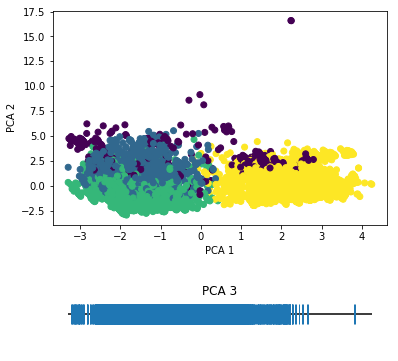

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(gtk_scale_df)
pca_gtk = pca.transform(gtk_scale_df)

fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 1], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

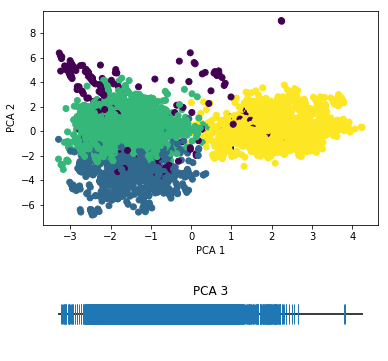

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 2], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

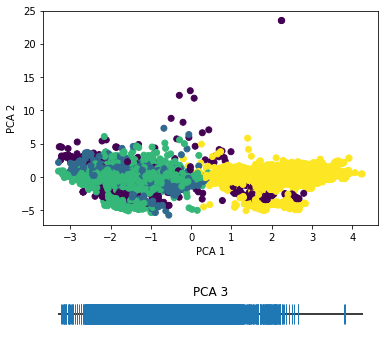

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_gtk[:, 0], pca_gtk[:, 3], c=gtk.labels)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(pca_gtk.shape[0])
ax[1].plot(pca_gtk[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

In [14]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(gtk_scale_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principalDf.head() 

,pc1,pc2,pc3,pc4
0,-2.253341,5.307736,5.343535,1.777196
1,0.683917,6.049377,4.861938,3.038515
2,-2.610732,4.841073,4.987737,2.807219
3,-2.981943,4.774377,5.499175,2.500672
4,-2.979839,4.767348,5.483138,2.500926


The first dimension will explain the most amount of variation in the data and subsequent components will explain less and less variation. This transformation will provide us with a smaller amount of continuous variables that we can cluster more effectively.

## K-means (K = 38)

In [16]:
kmeans = KMeans(n_clusters=38)

gtk_clusters = kmeans.fit(gtk_scale) # Using Standard Scaler
gtk_clusters.cluster_centers_

array([[-0.57646176,  0.20131074, -0.09307542, ..., -0.25376358,
        -0.14717056, -0.96740178],
       [ 0.35214195,  0.09897567,  0.05247429, ..., -0.21350984,
         1.24522829,  0.37235777],
       [ 0.36439802,  0.15344929,  0.19950433, ...,  3.94067578,
        -0.14717056, -1.02142956],
       ...,
       [-0.36593275,  0.28554608, -0.13986425, ..., -0.25376358,
        -0.14717056,  0.0557356 ],
       [-1.14815044, -0.21453462,  0.61713116, ..., -0.25376358,
        -0.14717056, -1.02142956],
       [-0.05425122,  0.02139055, -0.06631935, ..., -0.25376358,
        -0.14717056, -0.0857354 ]])

Using fit_predict, we can assign a cluster to each observation and then add this information back to our dataset:

In [17]:
gtk['Cluster'] = gtk_clusters.fit_predict(gtk_scale)
gtk.Cluster.value_counts()

5     2471
1     2070
37    1011
17     594
4      554
15     542
3      493
24     330
7      296
28     287
19     155
29     144
20     137
2      131
6      113
13     105
14     103
12      80
30      71
11      50
27      39
10      32
26      30
16      28
8       27
0       24
33      19
36      16
32      11
22      11
23       9
21       5
9        3
18       2
25       2
35       2
31       2
34       1
Name: Cluster, dtype: int64

The majority of the data is in the cluster 2, while clusters 0 and 3 has few observations.

Plotting the data will not provide us with a great deal of meaningful information. 
This is because the data has 10 dimensions. 

Therefore, creating a two dimensional plot will only capture some of the information and might not show completely separable clusters. 
However, it is interesting to look at some summary statistics for our clusters:

#### Attack Types in each Cluster

In [20]:
for x in range(0,39):
    print(gt[gtk.Cluster == x]['attacktype_txt'].value_counts())

Armed Assault                  15
Bombing/Explosion               7
Unknown                         1
Hostage Taking (Kidnapping)     1
Name: attacktype_txt, dtype: int64
Armed Assault                          1563
Assassination                           309
Hostage Taking (Kidnapping)             151
Facility/Infrastructure Attack           27
Unarmed Assault                          12
Bombing/Explosion                         4
Hostage Taking (Barricade Incident)       3
Hijacking                                 1
Name: attacktype_txt, dtype: int64
Bombing/Explosion                 102
Armed Assault                      15
Assassination                       7
Facility/Infrastructure Attack      3
Hostage Taking (Kidnapping)         2
Unknown                             2
Name: attacktype_txt, dtype: int64
Armed Assault                     304
Hostage Taking (Kidnapping)        97
Bombing/Explosion                  59
Assassination                      26
Facility/Infrastructure Att

In [21]:
gt[gtk.Cluster == 0]['attacktype_txt'].value_counts()

Armed Assault                  15
Bombing/Explosion               7
Unknown                         1
Hostage Taking (Kidnapping)     1
Name: attacktype_txt, dtype: int64

In [22]:
gt[gtk.Cluster == 1]['attacktype_txt'].value_counts()

Armed Assault                          1563
Assassination                           309
Hostage Taking (Kidnapping)             151
Facility/Infrastructure Attack           27
Unarmed Assault                          12
Bombing/Explosion                         4
Hostage Taking (Barricade Incident)       3
Hijacking                                 1
Name: attacktype_txt, dtype: int64

In [23]:
gt[gtk.Cluster == 2]['attacktype_txt'].value_counts()

Bombing/Explosion                 102
Armed Assault                      15
Assassination                       7
Facility/Infrastructure Attack      3
Hostage Taking (Kidnapping)         2
Unknown                             2
Name: attacktype_txt, dtype: int64

In [24]:
gt[gtk.Cluster == 3]['attacktype_txt'].value_counts()

Armed Assault                     304
Hostage Taking (Kidnapping)        97
Bombing/Explosion                  59
Assassination                      26
Facility/Infrastructure Attack      5
Unarmed Assault                     2
Name: attacktype_txt, dtype: int64

#### Band Name in each Cluster

In [27]:
for x in range(0,39):
    print(gt[gtk.Cluster == x]['band_name'].value_counts())

Other      19
Unknown     5
Name: band_name, dtype: int64
Unknown    1385
Other       685
Name: band_name, dtype: int64
Al-Qaida in Iraq    131
Name: band_name, dtype: int64
Communist Party of India - Maoist (CPI-Maoist)    489
Other                                               3
Unknown                                             1
Name: band_name, dtype: int64
Taliban    554
Name: band_name, dtype: int64
Unknown    2082
Other       389
Name: band_name, dtype: int64
Other      104
Unknown      9
Name: band_name, dtype: int64
Algerian Islamic Extremists                         188
Salafist Group for Preaching and Fighting (GSPC)    108
Name: band_name, dtype: int64
Kurdistan Workers' Party (PKK)    27
Name: band_name, dtype: int64
Unknown    3
Name: band_name, dtype: int64
Abu Sayyaf Group (ASG)    32
Name: band_name, dtype: int64
Al-Qaida in the Arabian Peninsula (AQAP)    50
Name: band_name, dtype: int64
Al-Shabaab    80
Name: band_name, dtype: int64
New People's Army (NPA)    105
N

In [32]:
gt[gtk.Cluster == 2]['band_name'].value_counts()

Al-Qaida in Iraq    131
Name: band_name, dtype: int64

In [33]:
gt[gtk.Cluster == 4]['band_name'].value_counts()

Taliban    554
Name: band_name, dtype: int64

In [36]:
gt[gtk.Cluster == 7]['band_name'].value_counts()

Algerian Islamic Extremists                         188
Salafist Group for Preaching and Fighting (GSPC)    108
Name: band_name, dtype: int64

In [39]:
gt[gtk.Cluster == 19]['band_name'].value_counts()

Other                                  82
Hamas (Islamic Resistance Movement)    42
Unknown                                25
Palestinian Extremists                  5
Gunmen                                  1
Name: band_name, dtype: int64

In [43]:
gt[gtk.Cluster == 28]['band_name'].value_counts()

Other                                               119
Unknown                                              68
Taliban                                              32
Communist Party of India - Maoist (CPI-Maoist)       30
Algerian Islamic Extremists                          21
Tehrik-i-Taliban Pakistan (TTP)                      13
Salafist Group for Preaching and Fighting (GSPC)      4
Name: band_name, dtype: int64

#### Mean number of kills in each Cluster

In [25]:
gtk.groupby(['Cluster'])['nkill'].mean()

Cluster
0        8.666667
1        3.716425
2       14.702290
3        2.592292
4        4.815884
5        6.227843
6        3.690265
7        2.979730
8        3.148148
9        9.000000
10       6.937500
11       4.780000
12       7.212500
13       2.409524
14       4.689320
15       1.383764
16      14.250000
17       5.026936
18    1383.500000
19       4.761290
20       4.941606
21       1.000000
22       1.545455
23      15.111111
24       5.615152
25       5.500000
26       3.933333
27       7.102564
28       5.557491
29       2.250000
30       3.366197
31       6.500000
32       2.363636
33       4.210526
34       1.000000
35       1.000000
36       6.000000
37       5.436202
Name: nkill, dtype: float64

## Clustering with DBSCAN


In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
gtk_dbscan = dbscan.fit(gtk_scale)
gtk['labels_DBSCAN'] = gtk_dbscan.labels_

gtk['labels_DBSCAN'].value_counts()

-1      6787
 40      329
 28      221
 67      119
 20      104
 56       73
 112      71
 69       68
 29       65
 71       63
 62       57
 81       55
 42       53
 73       53
 70       51
 58       47
 25       44
 64       43
 98       42
 109      42
 78       39
 76       39
 106      38
 83       35
 63       33
 94       33
 95       31
 80       30
 74       28
 54       27
        ... 
 48        5
 31        5
 103       5
 119       5
 143       5
 1         5
 164       5
 61        5
 145       5
 3         5
 43        5
 51        5
 59        5
 18        5
 123       5
 169       5
 131       5
 139       5
 155       5
 170       5
 159       5
 171       5
 12        5
 89        5
 44        5
 92        5
 140       5
 156       5
 167       5
 4         4
Name: labels_DBSCAN, Length: 173, dtype: int64

### K-Means vs DBSCAN

Text(0, 0.5, 'Number of Kills')

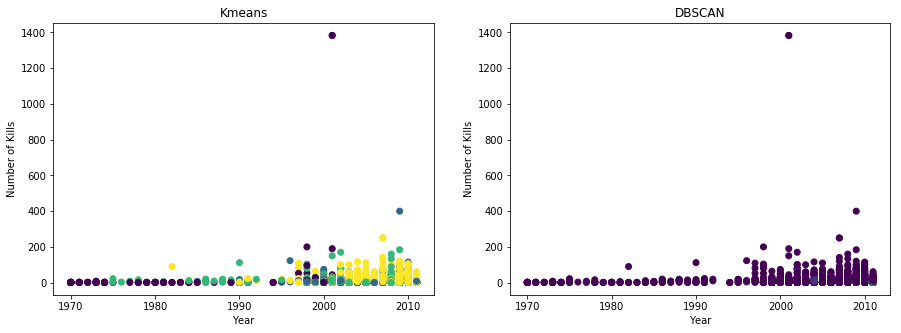

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['iyear'], gtk['nkill'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")

Text(0, 0.5, 'Negative Sentiment')

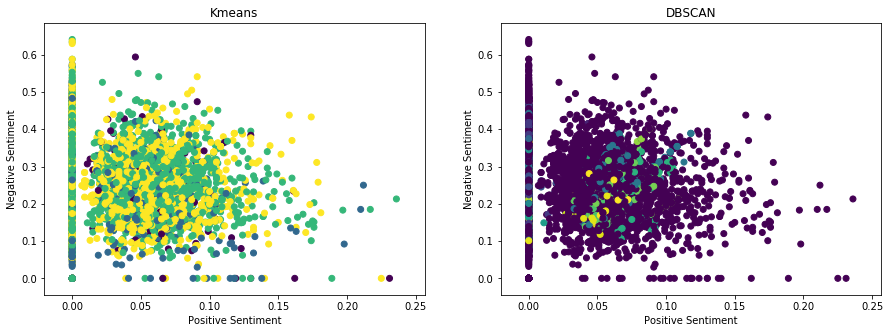

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['positive_sentiment'], gtk['negative_sentiment'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Positive Sentiment")
ax1.set_ylabel("Negative Sentiment")

ax2.scatter(gtk['positive_sentiment'], gtk['negative_sentiment'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Positive Sentiment")
ax2.set_ylabel("Negative Sentiment")

Text(0, 0.5, 'Number of Kills')

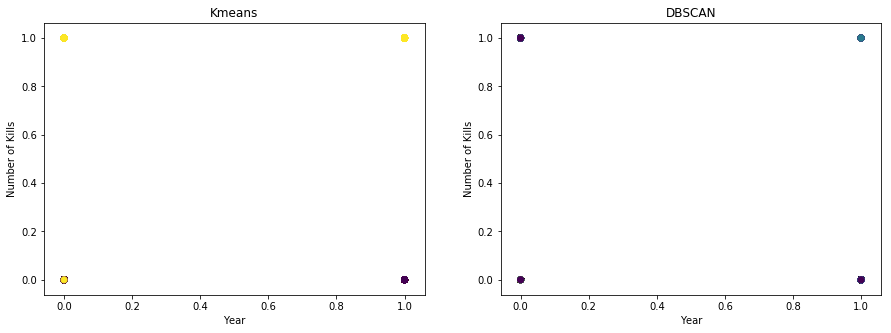

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(gtk['country_txt_Afghanistan'], gtk['weapon_txt_Firearms'], c = gtk['labels'])
ax1.set_title("Kmeans")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Kills")

ax2.scatter(gtk['country_txt_Afghanistan'], gtk['weapon_txt_Firearms'], c = gtk['labels_DBSCAN'])
ax2.set_title("DBSCAN")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Kills")